# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise e Previsão de Séries Temporais com Inteligência Artificial</font>

## <font color='blue'>Lab 3 - Parte 2</font>
## <font color='blue'>Análise Estatística de Séries Temporais</font>

![title](imagens/Lab3.png)

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [2]:
# Imports para manipulação de dados
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

seaborn    : 0.11.2
statsmodels: 0.13.2
pandas     : 1.4.4
matplotlib : 3.6.2



## Carregando o Conjunto de Dados

In [4]:
# Carrega os dados.
dados = pd.read_csv('dados/dataset.csv', header = None)

In [7]:
# Ajustando o nome de cada coluna.
dados.columns = ['mes','veiculos_produzidos']

Vamos converter a data do tipo object (string) para o tipo apropriado, datetime, pois assim podemos usar métodos e atributos específicos de datas.

In [13]:
# Convertendo a coluna data de object para datetime. 
dados['mes'] = pd.to_datetime(dados['mes'], format= '%Y-%m')

In [16]:
# Vamos transformar a coluna de data no índice do conjunto de dados. 
# Isso vai facilitar nosso trabalho mais a frente.
dados_serie = dados.set_index('mes')

In [18]:
dados_serie.head()

,veiculos_produzidos
mes,
2012-01-01,113
2012-02-01,119
2012-03-01,134
2012-04-01,129
2012-05-01,121


Agora sim podemos chamar esse conjunto de dados de série temporal. Vamos visualizar o índice:

In [19]:
# Formatando as saídas dos gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

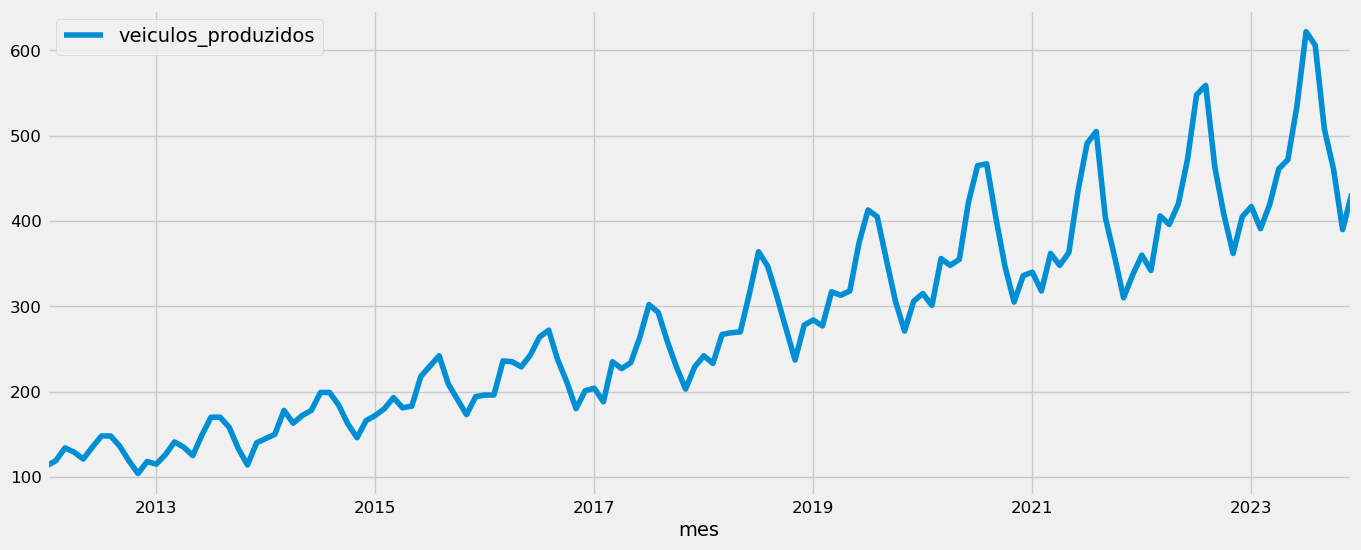

In [21]:
# Plot da série temporal
dados_serie.plot(figsize=(15,6))
plt.show()

O gráfico acima mostra 2 componentes da série: Sazonalidade e Tendência.

- Sazonalidade - o fenômeno se repete em períodos fixos.

- Tendência - ao longo do tempo, a série segue uma tendência de crescimento.

## Propriedades Estatísticas de Séries Temporais

Antes de iniciar qualquer modelagem preditiva em séries temporais é necessário verificar se essas propriedades estatísticas são constantes na série temporal:

- **Estacionariedade**: a série temporal **deve** ser estacionária, ou seja, suas características estatísticas, como média e variância, não mudam ao longo do tempo.


- **Não-autocorrelação**: as observações da série temporal não devem ser fortemente correlacionadas com observações anteriores.


- **Normalidade**: é frequentemente pressuposto que as observações da série temporal são distribuídas normalmente (seguem uma distribuição normal).

### Plot das Rolling Statistics (Estatísticas Móveis)

As estatísticas móveis, também conhecidas como estatísticas rolantes ou estatísticas deslizantes, são uma técnica usada na análise de séries temporais para calcular estatísticas, como média, mediana, soma, variância e desvio padrão, em uma janela deslizante de tamanho fixo ao longo da série. A ideia é analisar e entender as mudanças nas estatísticas locais ao longo do tempo, o que pode ajudar a identificar tendências, sazonalidade, pontos de mudança e outras características dos dados.

Para calcular estatísticas móveis, você define uma janela de tamanho 'n' (onde n é um número inteiro) e move a janela ao longo da série temporal, calculando a estatística desejada para cada subconjunto de dados dentro da janela. A janela avança uma observação de cada vez e o cálculo é repetido até que a janela alcance o final da série.

Por exemplo, para calcular a média móvel de uma série temporal, você seleciona uma janela de tamanho n e calcula a média dos valores dentro da janela. Em seguida, a janela é deslocada uma posição à frente e a média é recalculada para os novos valores na janela. Esse processo é repetido até que a janela atinja o final da série temporal.

Primeiro, vamos checar se as estatísticas móveis são ou não constantes ao longo da série temporal.

In [22]:
type(dados)

pandas.core.frame.DataFrame

In [26]:
# Determinando estatísticas móveis.
rolmean = dados['veiculos_produzidos'].rolling(window = 12).mean()
rolstd = dados['veiculos_produzidos'].rolling(window = 12).std()

In [27]:
# Prepara os dados para o plot.
x = dados['mes'].values
y = dados['veiculos_produzidos'].values

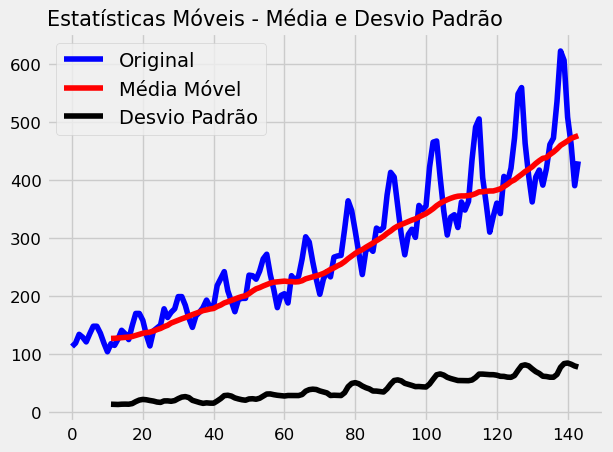

In [37]:
# Plot das estatísticas móveis.
orig = plt.plot(y, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão', fontsize = 15, loc='left')
plt.show()

Análise:
    
- Observamos que a média móvel e o desvio padrão não são constantes em relação ao tempo (tendência crescente).
- A série não é, portanto, estacionária.

### Plots da Função de Autocorrrelação (ACF) e Função de Autocorrelação Parcial (PACF)

Vamos criar os gráficos da ACF e PACF.

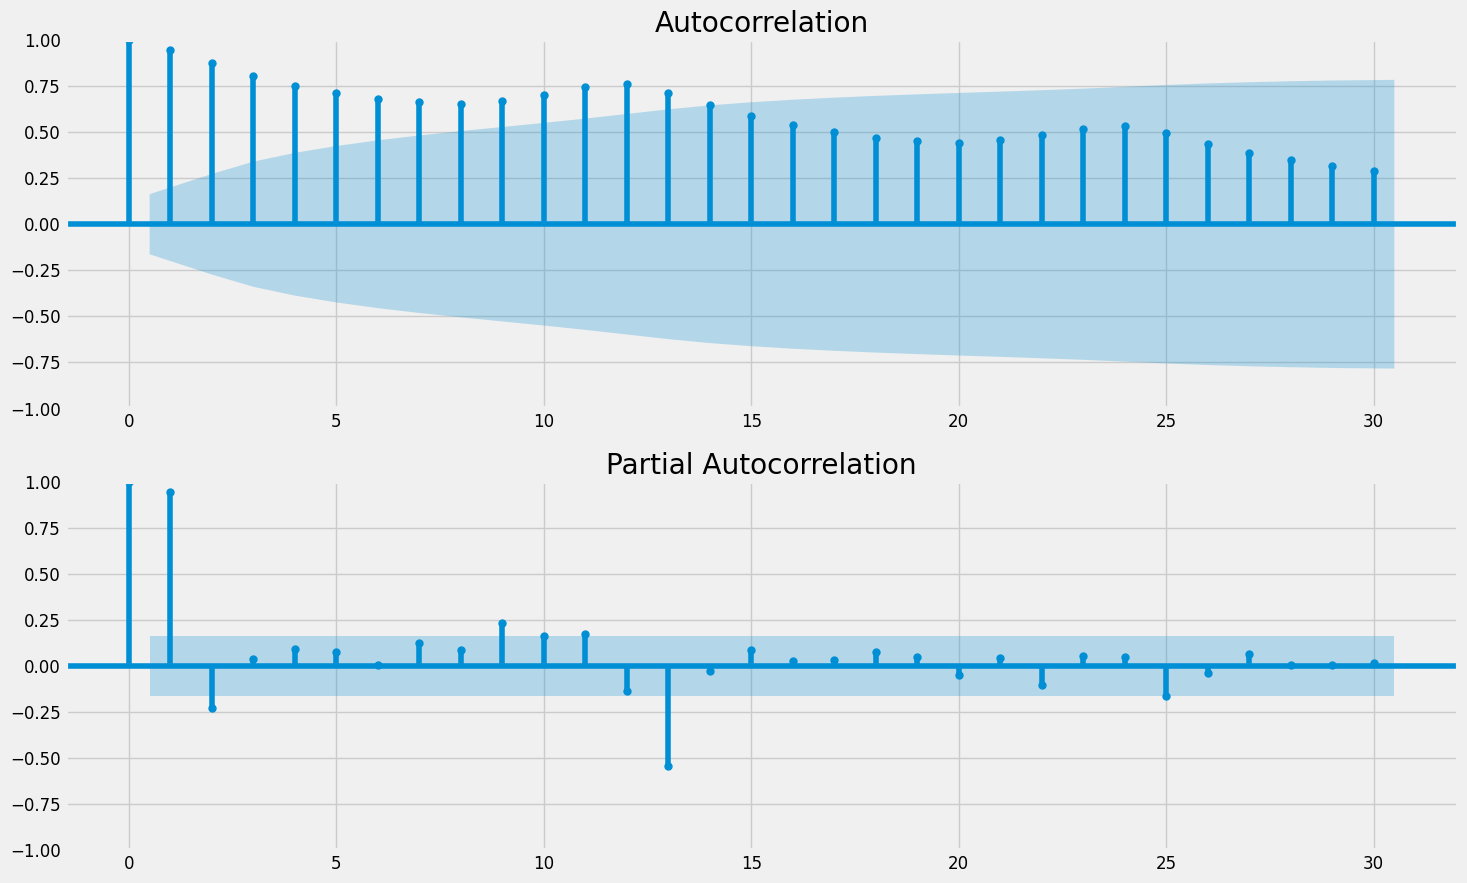

In [16]:
# Plots


# Plot do gráfico ACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html


# Plot do gráfico PACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html


Interpretação dos Gráficos:
    
No gráfico, o eixo vertical indica a autocorrelação e o horizontal a defasagem. 

A área sombreada em azul indica onde é significativamente diferente de zero. Como é possível ver na imagem, temos diversos valores ACF (barras verticais) acima do limite da área sombreada em azul. Nesses casos, a autocorrelação é diferente de zero, indicando que a série não é aleatória – conforme o esperado.

Algumas barras verticais estão dentro do limite da área sombreada em azul. Ou seja, a autocorrelação entre a série com alguns de seus lags é igual a zero, indicando que não há correlação.

Em termos simples: a área sombreada em azul aponta a significância. Se ultrapassada é porque tem correlação.

Cada barra no gráfico ACF representa o nível de correlação entre a série e seus atrasos em ordem cronológica. A área sombreada em azul indica se o nível de correlação entre a série e cada atraso é significativo ou não. 

Testando a hipótese nula de que a correlação do atraso com a série é igual a zero, podemos rejeitá-la sempre que o nível de correlação estiver acima ou abaixo da área sombreada em azul com um nível de significância de 5%. 

Caso contrário, sempre que a correlação estiver dentro da área sombreada em azul,  deixamos de rejeitar a hipótese nula e, portanto, podemos ignorar esses atrasos (ou assumir que não há correlação significativa entre eles e a série). 

O PACF é apenas uma visualização parcial do ACF.

Análise:
    
- Se a série temporal for estacionária, os gráficos do ACF / PACF mostrarão uma "queda rápida na correlação" após um pequeno atraso entre os pontos. Não é o caso em nossos gráficos. A queda lenta (redução do tamanho das barras) indica que essa série não é estacionária.


- Os dados da nossa série não são estacionários, pois um número alto de observações anteriores está correlacionado com valores futuros.


- Intervalos de confiança são desenhados na área azul clara. Por padrão, isso é definido como um intervalo de confiança de 95%, sugerindo que os valores de correlação fora desta área provavelmente são uma correlação e não um acaso estatístico.


- Teremos que transformar essa série em estacionária antes de criar um modelo preditivo. Veremos isso mais adiante.

### Teste Estatístico Dickey-Fuller Aumentado

- A intuição por trás do teste é que, se a série for integrada, o nível de atraso da série y (t-1) não fornecerá informações relevantes na previsão da mudança em y (t).


- Hipótese nula (H0): A série temporal não é estacionária.


- Hipótese alternativa (H1) - Rejeitar a hipótese nula (ou seja, um valor-p abaixo de 0.05) indicará estacionaridade.

In [17]:
# Teste Dickey-Fuller

# Print


# Teste


# Formatando a saída


# Loop por cada item da saída do teste


# Print



Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.804910
Valor-p                           0.991715
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64


Análise:

- O Valor-p é maior que 0.05. Não temos evidências para rejeitar a hipótese nula de que a série não é estacionária.   Logo, podemos concluir que a série NÃO é estacionária.

## Automatizando  o Teste de Estacionariedade

E aqui um presente para você. Uma função que executa o teste de estacionaridade e pode ser aplicada a qualquer série para testar se ela é ou não estacionária.

**Se a série não for estacionária, teremos que aplicar transformações antes da modelagem. Em nosso exemplo, a série não é estacionária e vamos transformá-la em estacionária mais adiante.**

Isso vale para qualquer série temporal.

In [18]:
# Função
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis


    # Plot das estatísticas móveis

    
    # Plot

    
    # Teste Dickey-Fuller:
    # Print


    # Teste
 

    # Formatando a saída


    # Loop por cada item da saída do teste


    # Print

    
    # Testa o valor-p
    

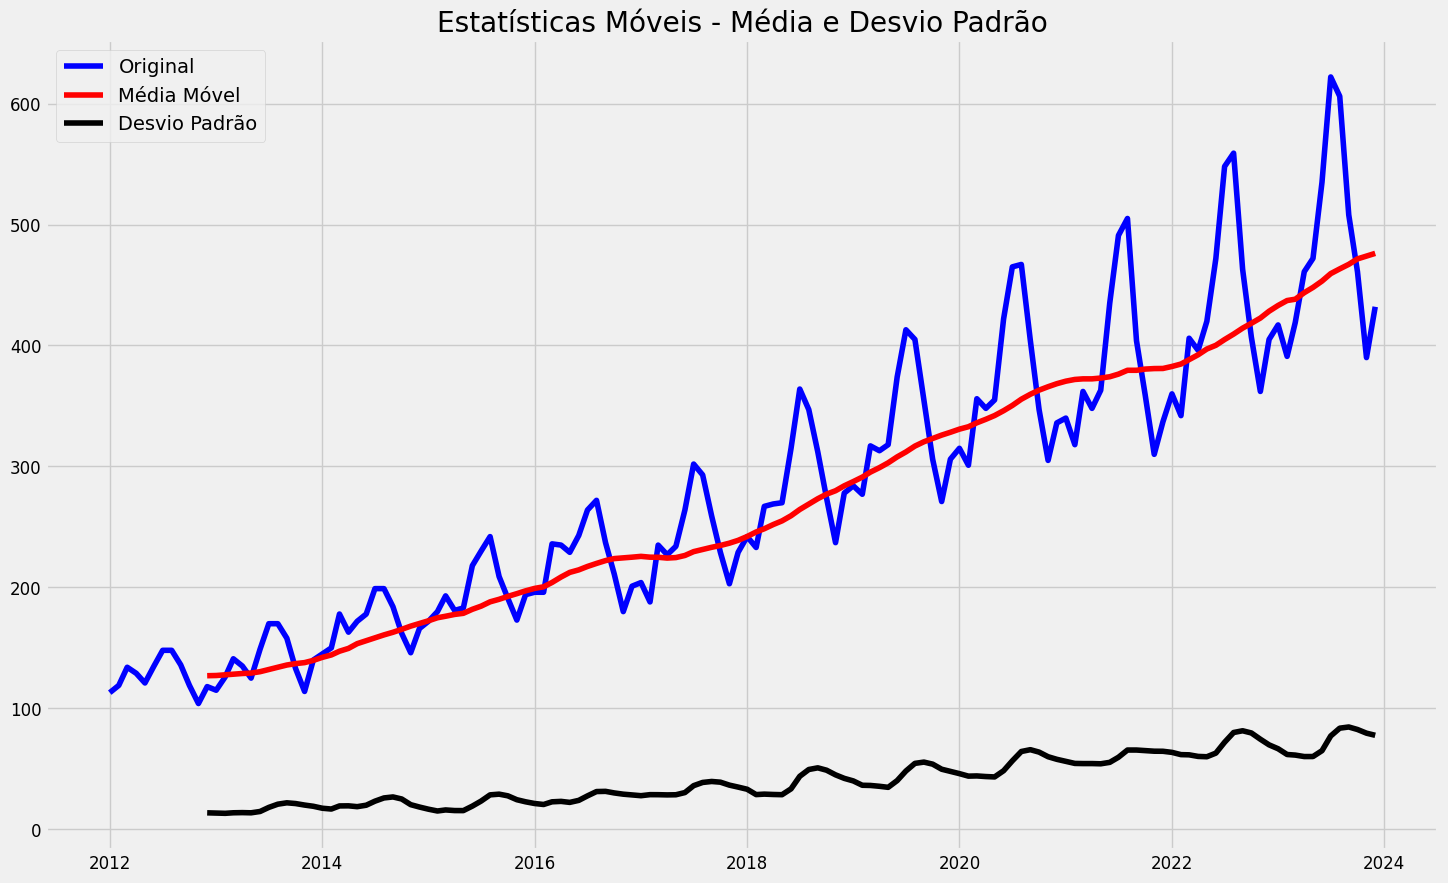


Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.804910
Valor-p                           0.991715
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [19]:
# Executando nossa função


# Fim da Parte 2